In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.

## a)

In [2]:
def simetrica(A):
    "Verifică dacă matricea A este simetrică"
    return np.all(A == A.T)

def pozitiv_definita(A):
    "Verifică dacă matricea A este pozitiv definită"

    for i in range(1, len(A) + 1):
        d_minor = np.linalg.det(A[:i, :i])
        if d_minor < 0:
            return False
    return True

def fact_ll(A):
    # Pasul 1
    if not simetrica(A):
        raise Exception("Nu este simetrica")
    if not pozitiv_definita(A):
        raise Exception("Nu este pozitiv definită")
    
    N = A.shape[0]

    # Pasul 2
    S = A.copy()
    L = np.zeros((N, N))

    # Pasul 3
    for i in range(N):
        # Actualizez coloana i din matricea L
        L[:, i] = S[:, i] / np.sqrt(S[i, i])

        # Calculez noul complement Schur
        S_21 = S[i + 1:, i]
        
        S_nou = np.eye(N)
        S_nou[i + 1:, i + 1:] = S[i + 1:, i + 1:] - np.outer(S_21, S_21.T) / S[i, i]

        S = S_nou
    
    # Returnez matricea calculată
    return L

In [3]:
A = np.array([
    [25, 15, -5],
    [15, 18, 0],
    [-5, 0, 11]
], dtype=np.float64)

L = fact_ll(A)
print("L este:")
print(L)
print("Verificare:")
print(L @ L.T)

L este:
[[ 5.  0.  0.]
 [ 3.  3.  0.]
 [-1.  1.  3.]]
Verificare:
[[25. 15. -5.]
 [15. 18.  0.]
 [-5.  0. 11.]]


## b)

In [4]:
b = np.array([1, 2, 3], dtype=np.float64)
y = np.zeros(3)
x = np.zeros(3)

# Substituție ascendentă
for i in range(0, 3):
    coefs = L[i, :i + 1]
    values = y[:i + 1]

    y[i] = (b[i] - coefs @ values) / L[i, i]

L_t = L.T
    
# Substituție descendentă
for i in range(2, -1, -1):
    coefs = L_t[i, i + 1:]
    values = x[i + 1:]

    x[i] = (y[i] - coefs @ values) / L_t[i, i]

print("x =", x)
print()
print("Verificare: A @ x =", A @ x)

x = [0.06814815 0.05432099 0.3037037 ]

Verificare: A @ x = [1. 2. 3.]


## 2.

In [5]:
def step(x, f, df):
    "Calculează un pas din metoda Newton-Rhapson."
    return x - f(x) / df(x)

def newton_rhapson(f, df, x0, eps):
    "Determină o soluție a f(x) = 0 plecând de la x_0"
    # Primul punct este cel primit ca parametru
    prev_x = x0
    
    # Execut o iterație
    x = step(x0, f, df)

    N = 1
    while True:
        # Verific condiția de oprire
        if abs(x - prev_x) / abs(prev_x) < eps:
            break

        # Execut încă un pas
        prev_x = x
        x = step(x, f, df)
        
        # Contorizez numărul de iterații
        N += 1

    return x, N

Funcția dată este
$$
f(x) = x^3 + 3 x^2 - 18 x - 40
$$
iar derivatele ei sunt
$$
f'(x) = 3x^2 + 6 x - 18
$$

$$
f''(x) = 6x + 6
$$

In [6]:
f = lambda x: (x ** 3) + 3 * (x ** 2) - 18 * x - 40
df = lambda x: 3 * (x ** 2) + 6 * x - 18
ddf = lambda x: 6 * x + 6

left = -8
right = +8
x_grafic = np.linspace(left, right, 500)

In [7]:
def set_spines(ax):
    # Mut axele de coordonate
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

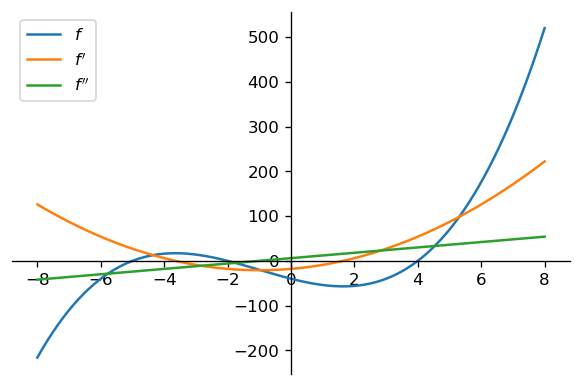

In [8]:
fig, ax = plt.subplots(dpi=120)

set_spines(ax)

plt.plot(x_grafic, f(x_grafic), label='$f$')
plt.plot(x_grafic, df(x_grafic), label="$f'$")
plt.plot(x_grafic, ddf(x_grafic), label="$f''$")
plt.legend()

plt.show()

Alegem subintervale astfel încât $f(a) f(b) < 0$:
- $[-8, -4]$
- $[-4, 0]$
- $[2, 6]$

Pentru fiecare dintre acestea, căutăm un punct $x_0$ astfel încât $f(x_0) f''(x_0) > 0$:
- $-6$
- $-1$
- $5$

In [9]:
eps = 1e-3

x1, _ = newton_rhapson(f, df, -6, eps)
x2, _ = newton_rhapson(f, df, -1, eps)
x3, _ = newton_rhapson(f, df, 5, eps)

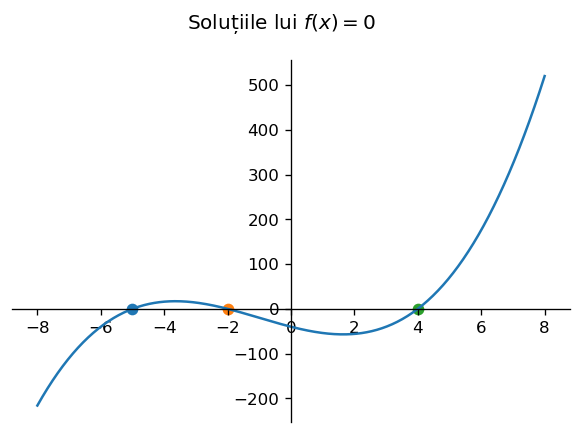

In [10]:
fig, ax = plt.subplots(dpi=120)
plt.suptitle('Soluțiile lui $f(x) = 0$')

set_spines(ax)

plt.plot(x_grafic, f(x_grafic))
plt.scatter(x1, 0)
plt.scatter(x2, 0)
plt.scatter(x3, 0)

plt.show()